In [4]:
import time
from datasets import *
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from ftl import FairDecisionTreeClassifier as FDTC
from sklearn.model_selection import StratifiedKFold as SKF

In [2]:
X, y, s  = get_adult_gender()

n_splits = 10
splitter = SKF(n_splits=10, random_state=n_splits, shuffle=True)
ys = [str(y[i]) + str(s[i]) for i in range(len(y))]

tests = []
for train_index, test_index in splitter.split(X, ys):
    tests.append(test_index.tolist())

time_idxs = []
for i in range(len(tests)):
    time_idx = np.array([value for test in tests[:i+1] for value in test])
    time_idxs.append(time_idx)
    

,9,0,1,2,3,4,5,6,7,10,11,12,13,class
0,Male,2.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,1.0,0.0,2.0,United-States,<=50K
1,Male,3.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,0.0,0.0,0.0,United-States,<=50K
2,Male,2.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,0.0,0.0,2.0,United-States,<=50K
3,Male,3.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,2.0,United-States,<=50K
4,Female,1.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,0.0,0.0,2.0,Cuba,<=50K


X shape: (45222, 12)
X_dummy shape: (45222, 97)
y dist: [0.75215603 0.24784397]
s dist: [0.67504754 0.32495246]


In [11]:
methods = ["auc_sub", "kamiran_sub"]
methods_times = []
for method in methods:
    method_times = []
    for time_idx in tqdm(time_idxs, desc=method):

        clf = FDTC(
            n_bins = 10,
            max_depth = 4,
            bootstrap=False,
            criterion=method,
            max_features=1.0,
        )
        
        time_start = time.perf_counter()
        clf.fit(X[time_idx], y[time_idx], s[time_idx])
        timer = time.perf_counter() - time_start
        
        method_times.append(timer)
    methods_times.append(np.array(method_times))

auc_sub:   0%|          | 0/10 [00:00<?, ?it/s]

kamiran_sub:   0%|          | 0/10 [00:00<?, ?it/s]

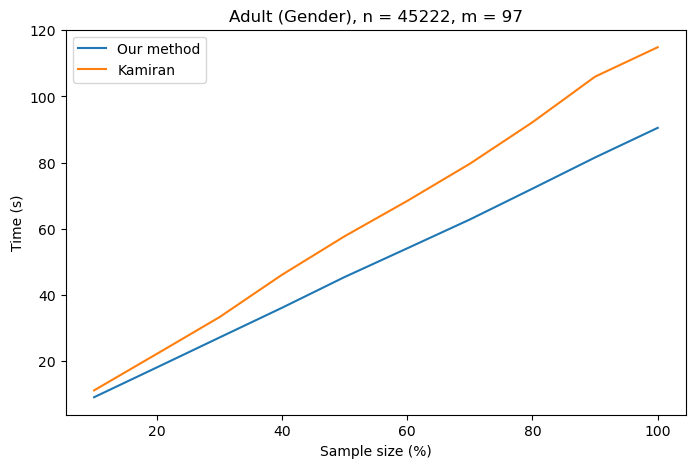

In [13]:
fig, ax = plt.subplots(1,1, dpi=100, figsize=(8,5))

ax.plot(
    np.array(range(1,11))*10,
    methods_times[0],
)

ax.plot(
    np.array(range(1,11))*10,
    methods_times[1],
)

ax.set_ylabel("Time (s)")
ax.set_xlabel("Sample size (%)")
ax.legend(["Our method", "Kamiran"])
ax.set_title("Adult (Gender), n = 45222, m = 97")
plt.show()

In [16]:
methods = ["auc_sub", "kamiran_sub"]
methods_times = []
for method in methods:
    method_times = []
    for d in tqdm(range(1,11), desc=method):

        clf = FDTC(
            n_bins = 10,
            max_depth = d,
            bootstrap=False,
            criterion=method,
            max_features=1.0,
        )
        
        time_start = time.perf_counter()
        clf.fit(X[time_idxs[0]], y[time_idxs[0]], s[time_idxs[0]])
        timer = time.perf_counter() - time_start
        
        method_times.append(timer)
    methods_times.append(np.array(method_times))

auc_sub:   0%|          | 0/10 [00:00<?, ?it/s]

kamiran_sub:   0%|          | 0/10 [00:00<?, ?it/s]

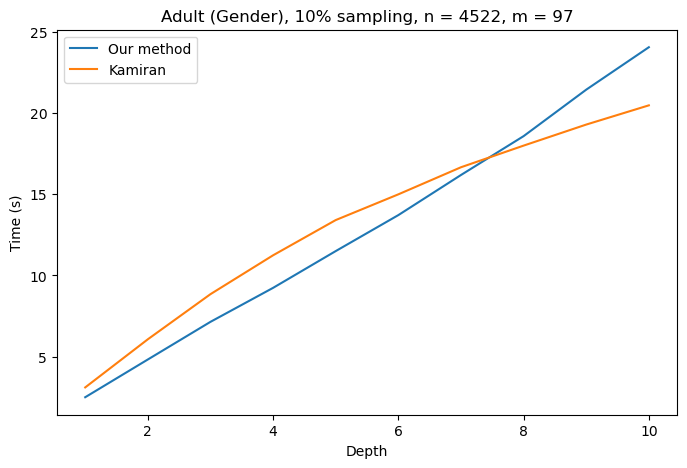

In [18]:
fig, ax = plt.subplots(1,1, dpi=100, figsize=(8,5))

ax.plot(
    np.array(range(1,11)),
    methods_times[0],
)

ax.plot(
    np.array(range(1,11)),
    methods_times[1],
)

ax.set_ylabel("Time (s)")
ax.set_xlabel("Depth")
ax.legend(["Our method", "Kamiran"])
ax.set_title("Adult (Gender), 10% sampling, n = 4522, m = 97")
plt.show()